In [6]:
import os
import json
import pandas # we will learn this today !!

### Review: Files and Exceptions

### Exception handling with Files:
- FileNotFoundError
- FileExistsError
 - ironically, used for directories, when using os.mkdir()
- JSONDecodeError
 - when json file has incorrect format

In [2]:
# Review 1:  FileNot Found Error
path = input("enter the name of the file to open:")
try:
    f = open(path, "r")  # "r" is for reading, but is the default
    d = f.read()
    print(d)
    f.close()
except FileNotFoundError as e:
    print(type(e))
    print(path, "could not be opened")

enter the name of the file to open:hello.py
<class 'FileNotFoundError'>
hello.py could not be opened


In [5]:
# Review 2: File Exists Error happens when you call os.mkdir to make the same directory twice
# Accidental execution of code containing mkdir twice

try:
    os.mkdir('new_test_dir')
except FileExistsError:
    print("Directory already exists!")
f = open(os.path.join('new_test_dir', 'out.txt'), 'w')
f.write('hi')
f.close()

# Reminder: Tell your self why you must use os.path.join
# 

Directory already exists!


### Remember that we can use these functions to help us read/write json files

In [8]:
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

In [9]:
# Review #3: 
# JSONDecodeError - requires import

# Steps:
# Get output of listdir
# Check for files with json extension
# Read each file's contents

files = os.listdir(".")

for some_file in files:
    if some_file.endswith(".json"):
        print("trying to read in ", some_file)
        try:
            read_json(some_file)
        except json.JSONDecodeError as e:
            continue # move on to reading next file

trying to read in  6.json
trying to read in  1.json
trying to read in  2.json
trying to read in  3.json
trying to read in  4.json
trying to read in  5.json


## Lecture 27 : Pandas, part 1 - Series

Learning Objectives:
- Create a pandas Series from a list or from a dict
- Use Series methods max, min, mean, median, mode, quantile, value counts
- Extract elements from a Series using Boolean indexing
- Access Series members using .loc, .iloc, .items, and slicing
- Perform Series element-wise operations

In [10]:
## What is Pandas? 
## Pandas is a package of tools for doing Data Science
## Pandas is installed on top of Python
## Pandas was installed with Anaconda, so its on your computers

# https://en.wikipedia.org/wiki/Pandas_(software)

In [11]:
import pandas as pd
# why do we do this? 
# saves us typing pandas

### Create a pandas Series from a list or from a dict

In [12]:
## A Pandas Series is like a combination of a list and a dictionary
# The word 'index' is used 


In [13]:
scores = pd.Series(   [44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84]   )
print(type(scores))
scores

<class 'pandas.core.series.Series'>


0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

In [14]:
## a Pandas series acts a lot like a list
## you can index and slice

#scores[3]
scores[3:6]

3    67
4    23
5    23
dtype: int64

### Use Series methods max, min, mean, median, mode, quantile, value counts

In [15]:
## Series calculations
## mean, median, mode, quartiles, sd, count
print(scores.mean(), scores.std(), scores.median(), sep='\t')


50.54545454545455	26.051347897426098	47.0


In [16]:
# there could be multiple modes, so mode returns a Series
print(scores.mode())

0    23
1    47
dtype: int64


In [17]:
# 5-Number summary
print(scores.quantile([1.0, 0.75, 0.5, 0.25, 0]))

1.00    92.0
0.75    72.5
0.50    47.0
0.25    27.5
0.00    19.0
dtype: float64


In [18]:
print(scores.quantile([0.9, 0.1]))

0.9    84.0
0.1    23.0
dtype: float64


In [19]:
# Series value counts create a series where 
# the key is the data, and the value is its count in the Series
ages = pd.Series([18, 19, 20, 20, 20, 17, 18, 24, 25, 35, 22, 20, 21, 21, 20, 23, 23, 19, 19, 19, 20, 21])
ages.value_counts()


20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

In [20]:
# A series can be sorted by index or by values
#ages.value_counts().sort_index()
ages.value_counts().sort_values(ascending=False)

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

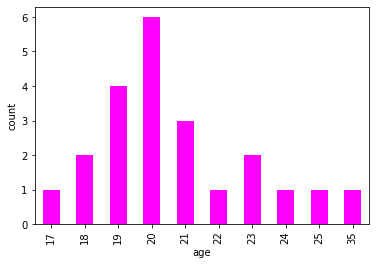

In [21]:
## Series bar chart
age_plot = ages.value_counts().sort_index().plot.bar(color='magenta')
age_plot.set(xlabel = "age", ylabel = "count")

### Extract elements from a Series using Boolean indexing

In [22]:
# ages boolean
# what ages are in the range 18 to 20, inclusive?

# & means 'and'
# | means 'or'
# ~ means 'not'
# we must use () for compound boolean expressions

print(ages [   (ages >= 18)     &      (ages <= 20)   ]      )


# what percentage of students are in this age range?

print(  len(   (ages[(ages >= 18) & (ages <= 20)])   )  /  len(ages) )




0     18
1     19
2     20
3     20
4     20
6     18
11    20
14    20
17    19
18    19
19    19
20    20
dtype: int64
0.5454545454545454


In [23]:
# what percentage of  students are ages 18 OR 21?
print(  len((ages[ (ages == 18) | (ages == 20)]))  /  len(ages) )

# what percentage of students are NOT 19? 
print(  len(  ages [ ~(ages==19)   ] )  /  len(ages) )


0.36363636363636365
0.8181818181818182


### Perform Series element-wise operations

In [24]:

# Let's add 1 to everyone's age
print(ages.value_counts())
ages = ages + 1
print(ages.value_counts())

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64
21    6
20    4
22    3
19    2
24    2
18    1
25    1
26    1
36    1
23    1
dtype: int64


In [318]:
# Now let's do all this by reading in the CSV data from the class survey
# read in all the data

In [7]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("cs220_survey_data.csv")
header = data[0]
print(len(data))
data = data[1:]
data[15:20]

721


[['LEC004',
  '20',
  'Mathematics/AMEP',
  '',
  '53711',
  'sausage',
  'Yes',
  'No',
  'night owl',
  'Yes'],
 ['LEC003',
  '18',
  'Science: Physics',
  'Data Science',
  '53706',
  'pepperoni',
  'No',
  'Yes',
  'early bird',
  'No'],
 ['LEC003',
  '19',
  'Data Science',
  'Economics',
  '53715',
  'pepperoni',
  'No',
  'Yes',
  'no preference',
  'Maybe'],
 ['LEC003',
  '19',
  'Engineering: Mechanical',
  'nuclear engineering',
  '53706',
  'sausage',
  'Yes',
  'No',
  'night owl',
  'Yes'],
 ['LEC003',
  '21',
  'Science: Chemistry',
  '',
  '',
  'green pepper',
  'Yes',
  'No',
  'early bird',
  'Maybe']]

In [10]:
# make a list comprehension of just the ages, but some ages are ''
age_list = [int(row[1]) for row in data if len(row[1]) > 0]
age_list[:5]

# put that into a Pandas Series
cs220_ages = pd.Series(age_list)
cs220_ages

0      19
1      20
2      20
3      19
4      20
       ..
701    22
702    20
703    19
704    21
705    19
Length: 706, dtype: int64

In [11]:
# find the mode


# find the age of the 75th percentile


# how many ages are > 25 ? 




0    19
dtype: int64


NameError: name 'ages' is not defined

In [325]:
# make a Series of the counts of all the ages, sorted from most common to least 
#cs220_ages.value_counts().sort_values()

# then sort it by index


46      1
37      1
35      1
34      1
33      1
32      1
31      1
30      2
29      2
28      3
27      2
26      4
25      7
24      6
23     13
22     41
21    101
20    178
19    290
18    214
17     11
16      1
dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

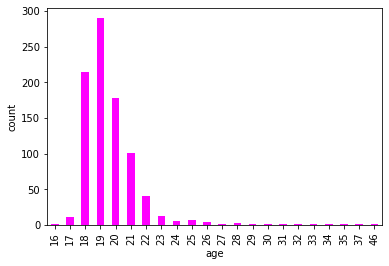

In [327]:
# make a bar chart of the ages sorted by age
# age_plot = cs220_ages.value_counts().sort_index().plot.bar(color='magenta')
# age_plot.set(xlabel = "age", ylabel = "count")

## A Series is a Cross between a list and a dict
## So we can make a series from a dict as well

In [329]:
## Series from a dict
game1points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1points)
game2points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5 , "Rachel": 7})
print(game2points)


Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64
Kiara       7
Chris       3
Trish      11
Mikayla     2
Ann         5
Rachel      7
dtype: int64


In [331]:
# Pandas can perform operations on two series by matching up their indices
total = None
total

Ann        13.0
Chris      13.0
Kiara      10.0
Mikayla     9.0
Rachel      NaN
Trish      17.0
dtype: float64

In [332]:
## Who has the most points?
print(total.max())
print(total.idxmax())


17.0
Trish


In [290]:
# we can use [] to name the index or by its sequence number
print(total['Kiara'], total[2])

10.0 10.0


In [291]:
# we can have multi-indexing....slightly different from slicing
total[  ["Chris", "Trish"]]

Chris    13.0
Trish    17.0
dtype: float64

In [333]:
total_sorted = total.sort_values(ascending=False)
total_sorted

Trish      17.0
Ann        13.0
Chris      13.0
Kiara      10.0
Mikayla     9.0
Rachel      NaN
dtype: float64

Text(0, 0.5, 'total points')

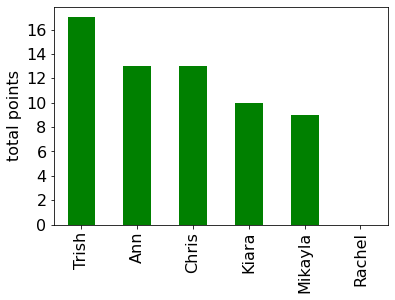

In [336]:
#ax = total_sorted.plot.bar(color="green", fontsize=16)
#ax.set_ylabel("total points", fontsize=16)

### Access Series members using .loc, .iloc, .items, and slicing
### This is your required reading after lecture